# Assignment 5
## Harshit Aggarwal RA1911003010782

Dataset used: wine quality dataset from kaggle

## Importing Libraries and Dataset

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


In [2]:
data = pd.read_csv('/content/winequalityN.csv')
data.head()
#a dataset, which tells the quality of wine based on various factors in the wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
data.describe()
#no out liners or extream values are present, as we can see from minimum, maximum and std rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [4]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.220172,0.323736,-0.112319,0.298421,-0.283317,-0.329747,0.459204,-0.251814,0.300380,-0.095603,-0.077031
volatile acidity,0.220172,1.000000,-0.378061,-0.196702,0.377167,-0.353230,-0.414928,0.271193,0.260660,0.225476,-0.038248,-0.265953
citric acid,0.323736,-0.378061,1.000000,0.142486,0.039315,0.133437,0.195218,0.096320,-0.328689,0.057613,-0.010433,0.085706
residual sugar,-0.112319,-0.196702,0.142486,1.000000,-0.128902,0.403439,0.495820,0.552498,-0.267050,-0.185745,-0.359706,-0.036825
chlorides,0.298421,0.377167,0.039315,-0.128902,1.000000,-0.195042,-0.279580,0.362594,0.044806,0.395332,-0.256861,-0.200886
free sulfur dioxide,-0.283317,-0.353230,0.133437,0.403439,-0.195042,1.000000,0.720934,0.025717,-0.145191,-0.188489,-0.179838,0.055463
total sulfur dioxide,-0.329747,-0.414928,0.195218,0.495820,-0.279580,0.720934,1.000000,0.032395,-0.237687,-0.275381,-0.265740,-0.041385
density,0.459204,0.271193,0.096320,0.552498,0.362594,0.025717,0.032395,1.000000,0.011920,0.259454,-0.686745,-0.305858
pH,-0.251814,0.260660,-0.328689,-0.267050,0.044806,-0.145191,-0.237687,0.011920,1.000000,0.191248,0.121002,0.019366
sulphates,0.300380,0.225476,0.057613,-0.185745,0.395332,-0.188489,-0.275381,0.259454,0.191248,1.000000,-0.003261,0.038729


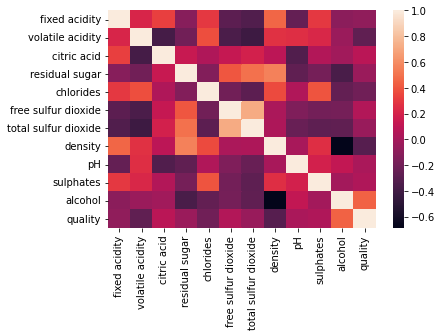

In [5]:
import seaborn as sns
sns.heatmap(data.corr())

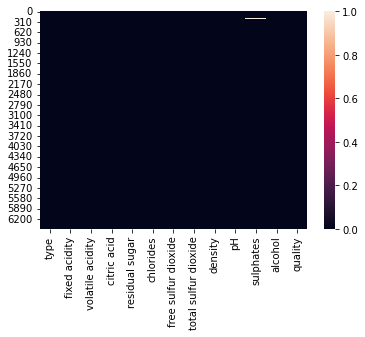

In [6]:
sns.heatmap(data.isnull())

In [7]:
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [8]:
pos = data[['quality']] == 1

pos_n = 0;
pos.iloc[:,0]

for i in range(pos.shape[0]):
    if pos.iloc[i][0] == True:
        pos_n+=1
        
print('Positive_count = ',pos_n)
print('Negative_count = ',pos.shape[0] - pos_n)

Positive_count =  0
Negative_count =  6497


Therefore, out of 1599 examples, we have only 217 positive datasets, and rest are negative

## Splitting into training and testing dataset

In [11]:
y = data.iloc[:,-1]
X = data.iloc[:,:-1]
# X = Training Features, y = Target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

## Building Model and Training

In [12]:
model = DecisionTreeClassifier()

In [ ]:
model.fit(X_train,y_train)

In [ ]:
y_prd = model.predict(X_test)
print(f1_score(y_test,y_prd))
print(confusion_matrix(y_test,y_prd))


0.5454545454545454
[[368  45]
 [ 25  42]]


In [ ]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

## Accuracy with default Hyperparameters

In [ ]:
# tweeking Hyperparameters to get the best f1 score, for this dataset
# as no. of positives is very less than no. negatives, it is better to find f1 scores

#here, we are iterating over possible values of hyperparameneters,train model, then test it on testing dataset, then find
#f1-score and finding the best hyperparameters so that the model has optimul bias and variance
max_depth = list(range(5,20))#values for max_depth
leaves = list(range(20,125))  #values for max_leaf_nodes
Min_sample_leaf = list(range(1,50)) #values for min_sapmles_leaf

best_score = 0;
best_max_depth = 0;
best_max_leaf_nodes = 0;
best_min_sample_leaf = 0;


for dp in range(len(max_depth)):
    for lev in range(len(leaves)):
        for sl in range(len(Min_sample_leaf)):
            model = DecisionTreeClassifier(max_depth = max_depth[dp], max_leaf_nodes= leaves[lev],min_samples_leaf = Min_sample_leaf[sl])
            model.fit(X_train,y_train)
            y_pred = model.predict(X_test)
            
            score = f1_score(y_test,y_pred)
            
            if(score > best_score):
                print(score)
                best_score = score
                best_max_depth = max_depth[dp]
                best_max_leaf_nodes = leaves[lev]
                best_min_sample_leaf = Min_sample_leaf[sl]
                
print( best_score,'depth=', best_max_depth,'max_leaf_nodes=', best_max_leaf_nodes,'min_sample_leaf=',best_min_sample_leaf)
            

0.45045045045045046
0.4590163934426229
0.47154471544715443
0.4736842105263158
0.48
0.4920634920634921
0.5
0.5087719298245613
0.5161290322580644
0.5196850393700787
0.5203252032520325
0.5245901639344261
0.532258064516129
0.5409836065573771
0.5454545454545454
0.5468749999999999
0.5606060606060606
0.5625
0.5671641791044776
0.5797101449275361
0.5899280575539567
0.5945945945945946
0.5972222222222222
0.6056338028169014
0.6122448979591838
0.6301369863013699
0.6301369863013699 depth= 11 max_leaf_nodes= 95 min_sample_leaf= 1



Here, with the above printed hyperparameteres, we are getting the highest f1 score.
Hence we found the best model with optimal bias and variance.

[Text(172.32352941176472, 201.90857142857143, 'X[10] <= 11.55\ngini = 0.232\nsamples = 1119\nvalue = [969, 150]'),
 Text(108.31764705882354, 170.84571428571428, 'X[1] <= 0.335\ngini = 0.135\nsamples = 951\nvalue = [882, 69]'),
 Text(39.38823529411765, 139.78285714285715, 'X[9] <= 0.745\ngini = 0.405\nsamples = 103\nvalue = [74, 29]'),
 Text(19.694117647058825, 108.72, 'gini = 0.245\nsamples = 49\nvalue = [42, 7]'),
 Text(59.082352941176474, 108.72, 'gini = 0.483\nsamples = 54\nvalue = [32, 22]'),
 Text(177.24705882352941, 139.78285714285715, 'X[9] <= 0.645\ngini = 0.09\nsamples = 848\nvalue = [808, 40]'),
 Text(98.47058823529412, 108.72, 'X[6] <= 35.5\ngini = 0.036\nsamples = 546\nvalue = [536, 10]'),
 Text(59.082352941176474, 77.65714285714284, 'X[5] <= 11.5\ngini = 0.073\nsamples = 238\nvalue = [229, 9]'),
 Text(39.38823529411765, 46.59428571428572, 'X[4] <= 0.073\ngini = 0.033\nsamples = 178\nvalue = [175, 3]'),
 Text(19.694117647058825, 15.531428571428563, 'gini = 0.113\nsamples = 

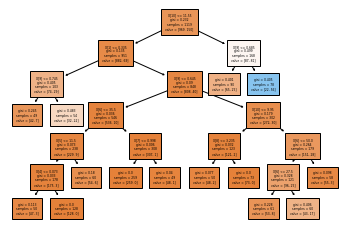

In [ ]:
tree.plot_tree(model, filled=True, fontsize=3)

# Random Forest

## Importing libraries and dataset

In [14]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [17]:
data = pd.read_csv('/content/winequalityN.csv')
data.head()
#same data as above

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Splitting into training and testing

In [18]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

## Building model and training

In [19]:
model = RandomForestClassifier()

In [ ]:
model.fit(X_train,y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
f1_score(y_test,y_pred)

0.6333333333333333

## Tweaking Hyperparameters to get the best f1 score, for this dataset

In [ ]:
n = list(range(5,120,5))
max_depth = list(range(5,20))#values for max_depth


best_score = 0;
best_n = 0;
best_max_depth = 0;
best_max_leaf_nodes = 0;
best_min_sample_leaf = 0;

for ne in range(len(n)):
    for dp in range(len(max_depth)):
        
        model = RandomForestClassifier(n_estimators = n[ne],max_depth = max_depth[dp],n_jobs = -1)
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)

        score = f1_score(y_test,y_pred)

        if(score > best_score):
            print(score)
            best_score = score
            best_n = n[ne]
            best_max_depth = max_depth[dp]
                   
                
print( best_score,'n= ', best_n,'depth=', best_max_depth,)
            


0.41509433962264153
0.4793388429752066
0.5486725663716815
0.6016260162601625
0.608
0.6341463414634146
0.6446280991735536
0.6446280991735536 n=  30 depth= 17 max_leaf_nodes=


Here, with the above printed hyperparameteres, we are getting the highest f1 score.
Hence we found the best model with optimal bias and variance.

For this data set, we can we that the f1 score of random forest is higher than that of a decision tree.

In [ ]:
final_model= RandomForestClassifier(n_estimators  = 30, max_depth = 17)

In [ ]:
final_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=17, n_estimators=30)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[394,  14],
       [ 34,  38]], dtype=int64)

# Hence we have got the results and the differences